In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
model = torch.jit.load('mnist_cnn.pth')

In [4]:
device=device=torch.device('cpu')
batch_size=64

In [7]:
print(model)

RecursiveScriptModule(
  original_name=CNN
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (pool): RecursiveScriptModule(original_name=MaxPool2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (fc1): RecursiveScriptModule(original_name=Linear)
)


In [7]:
train_dataset= datasets.MNIST(root='dataset/', train=True , transform=transforms.ToTensor() , download=True)
train_loader=DataLoader(dataset=train_dataset , batch_size=batch_size , shuffle= True)
test_dataset=datasets.MNIST(root='dataset/', train=False , transform=transforms.ToTensor() , download=True)
test_loader=DataLoader(dataset=test_dataset , batch_size=batch_size , shuffle= False)


In [8]:
def show_random_image_and_prediction(model, test_loader, device):

    model.eval() # Set the model in evaluation mode

    test_batches = list(test_loader)
    random_batch = random.choice(test_batches)
    images, labels = random_batch
    
    rand_idx=np.random.randint(64)
     
    image = images[rand_idx]    #dimension is (1,28,28) , it is the randomly chosen image
    actual_label = labels[rand_idx].item()
    
    # Reshape the image to (28, 28) for visualization (since it's a grayscale image)
    image_for_display = image.squeeze()  # Remove the channel dimension, from (1, 28, 28) to (28, 28)
    
    image = image.unsqueeze(0).to(device)    #the model expects (1,1,28,28) since model has been trained on (64,1,28,28)
    #so we unsqeeze(add dimension at dim=0) 
    
    with torch.no_grad():
        prediction = model(image)
        predicted_label = prediction.argmax(1).item()
    
    plt.imshow(image_for_display)
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.show()

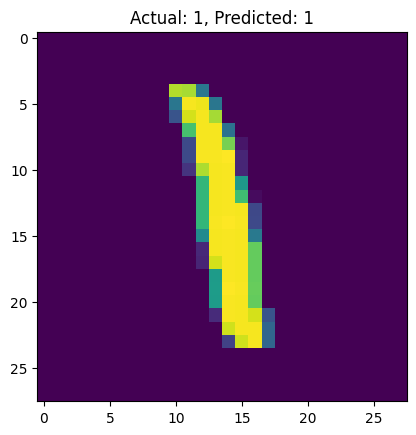

In [12]:
show_random_image_and_prediction(model, test_loader, device)